In [1]:
import numpy as np
from lampe.data import H5Dataset
from pathlib import Path
import os
import torch
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/mvasist/Highres/')
from DataProcuring import Data


os.environ['SCRATCH'] = os.path.join('/scratch/users/mvasist/')
scratch = os.environ.get('SCRATCH', '')
# scratch = '/users/ricolandman/Research_data/npe_crires/'
datapath = Path(scratch) / 'highres-sbi/data_fulltheta'
datapath_old = Path(scratch) / 'highres-sbi/data'



In [2]:
trainset = H5Dataset(datapath / 'train.h5')
m = []

In [11]:
for j, (theta, x) in enumerate(trainset):
    # print(x.size())
#     print(j)
    if torch.isnan(x).any():
        print(j, 'there is a nan here')
#     break
#     m.append(x[0].mean())

# np.savetxt('spectral_mean.csv', m)

tensor(False)

In [22]:
m = np.loadtxt('spectral_mean.csv')

In [23]:
np.shape(m)

(835584,)

(array([7.9533e+05, 1.3349e+04, 7.6110e+03, 5.7550e+03, 3.8390e+03,
        2.8300e+03, 1.9450e+03, 1.4280e+03, 1.0280e+03, 8.3300e+02,
        5.7200e+02, 3.9900e+02, 2.5600e+02, 1.8300e+02, 1.0200e+02,
        6.5000e+01, 3.9000e+01, 1.0000e+01, 5.0000e+00, 5.0000e+00]),
 array([1.04206144e-10, 1.60889783e+02, 3.21779565e+02, 4.82669348e+02,
        6.43559131e+02, 8.04448914e+02, 9.65338696e+02, 1.12622848e+03,
        1.28711826e+03, 1.44800804e+03, 1.60889783e+03, 1.76978761e+03,
        1.93067739e+03, 2.09156718e+03, 2.25245696e+03, 2.41334674e+03,
        2.57423652e+03, 2.73512631e+03, 2.89601609e+03, 3.05690587e+03,
        3.21779565e+03]),
 <BarContainer object of 20 artists>)

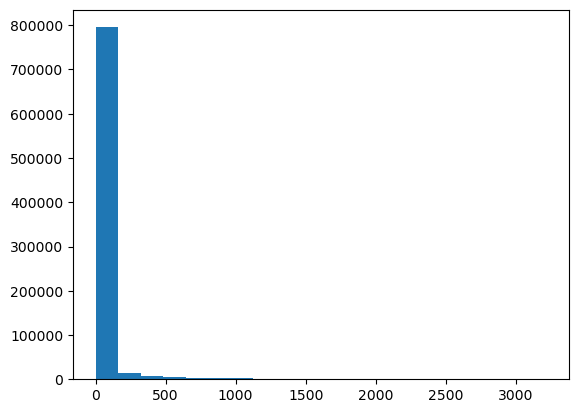

In [24]:
plt.hist(m, bins=20)


In [25]:
m
np.median(m)

14.251608848571777

nan

In [10]:
trainset_old = H5Dataset(datapath_old / 'train.h5')
m_old = []

In [11]:
# for theta, x in trainset_old:
#     # print(x.size())
#     m_old.append(x[0].mean())

# np.savetxt('spectral_mean_old.csv', m_old)
m_old = np.loadtxt('spectral_mean_old.csv')

In [12]:
np.shape(m_old)

(835584,)

(array([7.7116e+05, 2.4104e+04, 4.3880e+03, 4.5880e+03, 5.3280e+03,
        3.9800e+03, 3.8760e+03, 3.3680e+03, 1.6320e+03, 2.8800e+03,
        2.0440e+03, 1.9360e+03, 1.7320e+03, 1.1160e+03, 1.6200e+03,
        6.0800e+02, 8.1600e+02, 3.0800e+02, 0.0000e+00, 1.0000e+02]),
 array([1.42144648e-10, 4.45733619e+01, 8.91467238e+01, 1.33720086e+02,
        1.78293448e+02, 2.22866810e+02, 2.67440172e+02, 3.12013533e+02,
        3.56586895e+02, 4.01160257e+02, 4.45733619e+02, 4.90306981e+02,
        5.34880343e+02, 5.79453705e+02, 6.24027067e+02, 6.68600429e+02,
        7.13173791e+02, 7.57747153e+02, 8.02320515e+02, 8.46893876e+02,
        8.91467238e+02]),
 <BarContainer object of 20 artists>)

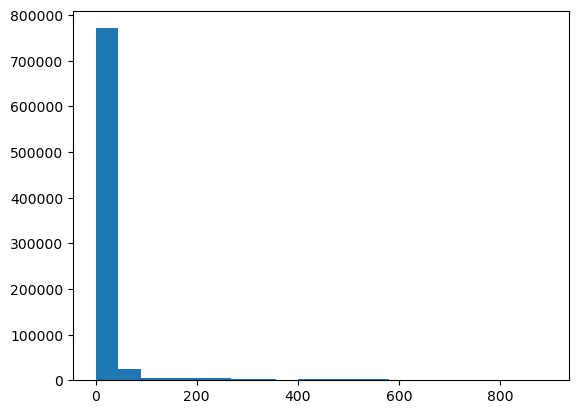

In [13]:
plt.hist(m_old*d.flux_scaling, bins=20)


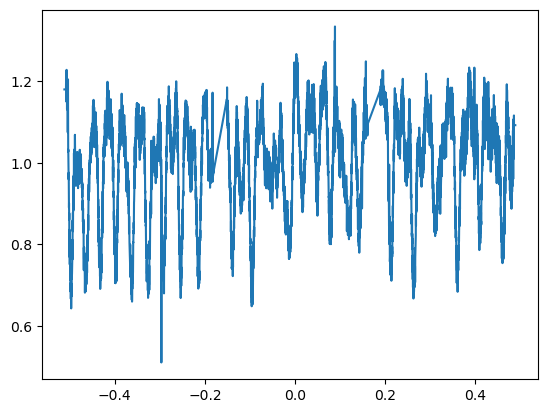

In [8]:
d = Data()
plt.plot(d.data_wavelengths_norm, d.flux*d.flux_scaling)
# d.data_wavelengths_norm, d.flux, d.err


In [14]:
d.flux.mean()

40049.21152810275

In [15]:
d.flux_scaling

2.4969280588665137e-05

(array([5.841e+03, 2.950e+02, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 756.9818874 , 1235.13104721, 1713.28020702, 2191.42936683,
        2669.57852664, 3147.72768645, 3625.87684626, 4104.02600607,
        4582.17516588, 5060.32432569, 5538.4734855 ]),
 <BarContainer object of 10 artists>)

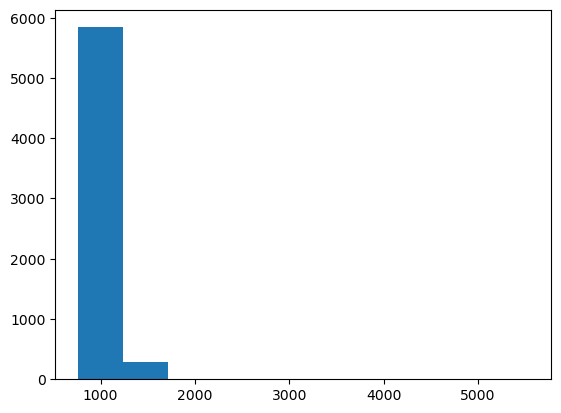

In [27]:
plt.hist(d.err)

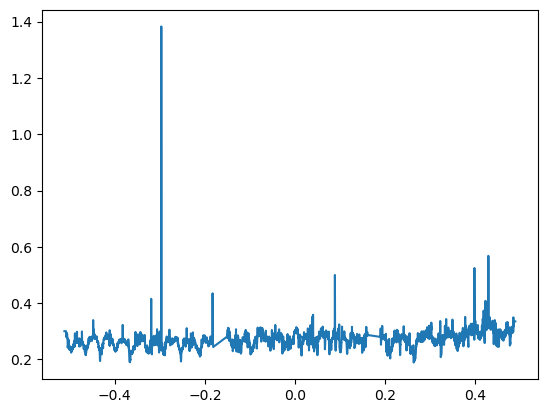

In [37]:
plt.plot(d.data_wavelengths_norm, d.err*d.flux_scaling*10)

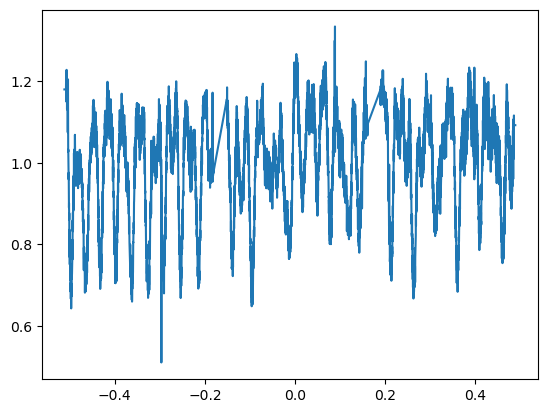

In [38]:
plt.plot(d.data_wavelengths_norm, d.flux*d.flux_scaling)


In [29]:
1000/40000

0.025

In [ ]:
'''
To DO

- check the fluxes once again, scaling seems to be the issue
- try MHA and causal conv 

'''